# Introducción a los cuadernos de Jupyter y Sympy
Sympy es un módulo de algebra para Python. Lo estamos usando a travez de una interfaz conveniete que son los [Jupyter Notebook](http://jupyter.org/). Este cuaderno intenta mostrarles algunas de las caracetrísticas más útiles de Sympy así como de la inerface de los cuadernos.

Este cuaderno usará Python como lenguaje de programación. Esto significa que la mayor parte de lo aprendido en este curso puede ser desarrollado y aplicado en cuadernos. Los caudernos se dividen en celdas donde se puede poner código y luego correrlo haciendo Mayuscula + Enter.

## Un recorrido rápido

Tómese un segundo para recorrer la interfaz del portátil haciendo clic en "Ayuda, recorrido de la interfaz de usuario" (solo disponible en notebooks clásicos y no en jupyter lab). También tenga en cuenta que hay ayuda disponible para varias otras cosas en ese menú.

Ahora que está familiarizado con la nomenclatura, ¡ejecutemos algo de código!

*Evalúe la celda a continuación para imprimir por pantalla el mensaje "Hello World" haciendo clic dentro de la celda y luego presionando Shift + Enter*

In [1]:
for word in ['Hello', 'World']:
    print(word)

Hello
World


In [2]:
a = 1
a

1

### Matemáticas en cuadros de texto

El editor de texto admite matemáticas en notación [$\LaTeX$] (latex). Puede hacer doble clic en un cuadro de texto para ver los códigos utilizados para ingresarlo:

$$f(a)=\int^{a=\infty}_{a=0} \frac{1}{a+2} \mathrm{d}a$$

Haga doble clic en la fórmula anterior para ver el código que la produjo.

## Introducción a SymPy

Necesitamos importar [el módulo SymPy](http://docs.sympy.org/latest/index.html) para obtener capacidades matemáticas simbólicas.

In [3]:
import sympy as sp

Necesitamos comenzar la forma de imprimir formulas por pantalla para obtener una visualización tipográfica agradable.

_Tenga en cuenta que esto cambia algo en función de la versión de sympy_

In [4]:
sp.init_printing()

Para hacer cálculos simbólicos, necesitamos crear un símbolo.

In [5]:
x = sp.Symbol('x')

In [6]:
x

Sympy nos permite hacer muchas operaciones matemáticas que serían tediosas a mano. Por ejemplo, podemos expandir un polinomio:

In [7]:
polynomial = (2*x + 3)**4
polynomial.expand()

Observe lo que sucedió: definimos un nuevo nombre llamado `polinomial` y luego usamos el método `.expand()` para expandir el polinomio. Podemos ver todos los métodos asociados con un objeto escribiendo su nombre y un punto y luego presionando "tabulador".

Acceda a la lista de métodos para la variable polinomial ingresando "." y presionando tabulador al final de la línea en la celda a continuación.

Para obtener ayuda sobre cualquier método, podemos escribir su nombre y agregar un `?` al final, luego evaluar la celda.

Obtenga ayuda sobre el método `.expand()` mediante la evaluación de la celda a continuación:

In [30]:
polynomial.expand?

Signature:
polynomial.expand(
    deep=True,
    modulus=None,
    power_base=True,
    power_exp=True,
    mul=True,
    log=True,
    multinomial=True,
    basic=True,
    **hints,
)
Docstring:
Expand an expression using hints.

See the docstring of the expand() function in sympy.core.function for
more information.
File:      ~/miniconda3/envs/dyc/lib/python3.7/site-packages/sympy/core/expr.py
Type:      method


También es posible obtener ayuda para una función colocando el cursor entre los paréntesis y presionando Mayús + Tabulador

Por supuesto, también podemos factorizar polinomios:

In [9]:
(x**2 + 2*x + 1).factor()

### Cálculo

Sympy sabe integrar y diferenciar.

In [10]:
polynomial.diff(x) # First derivative

In [11]:
polynomial.diff(x, 2) # Second derivative

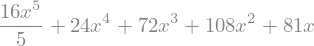

In [12]:
polynomial.integrate(x) # indefinite integral - note no constant of integration is added

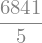

In [13]:
polynomial.integrate((x, 1, 2)) # Note that integrate takes one argument which is a tuple for the definite integral

### Límites

Podemos evaluar los límites usando SymPy, incluso para límites "interesantes" donde necesitaríamos la regla de L'Hopital

In [14]:
sp.limit((2*sp.sin(x) - sp.sin(2*x))/(x - sp.sin(x)), x, 0)

### Aproximación

SymPy tiene soporte incorporado para la expansión de series de Taylor

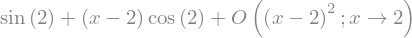

In [15]:
nonlinear_expression = sp.sin(x)
sp.series(nonlinear_expression, x, 2, 2) # taylor expansion in terms of the x variable, around x=2, first order.

Para eliminar el término de perdida use `.removeO()`

In [16]:
temp = sp.series(nonlinear_expression, x, 2, 2)
temp.removeO()

También notará que el comportamiento predeterminado de SymPy es retener representaciones exactas de ciertos números:

In [17]:
number = sp.sqrt(2)*sp.pi
number

Para convertir las representaciones exactas de arriba en representaciones aproximadas de [punto flotante](https://en.wikipedia.org/wiki/Floating_point), use uno de estos métodos. `sympy.N` funciona con expresiones complicadas que también contienen variables. `float` devolverá un número de tipo `float` de Python normal y es útil cuando se interactúa con programas que no son de Sympy.

In [18]:
sp.N(number*x)

In [19]:
float(number)

### Resolver ecuaciones

Sympy puede ayudarnos a resolver y manipular  ecuaciones utilizando la función `solve`. Como muchas funciones de resolución, encuentra ceros de una función, por lo que tenemos que reescribir las ecuaciones de igualdad para que sean iguales a cero,

$$
\begin{aligned}
 2x^2 + 2 &= 4 \\
 2x^2 + 2 - 4 &= 0
\end{aligned}
$$


In [20]:
solutions = sp.solve(2*x**2 + 2 - 4)
solutions


In [21]:
solutions[0]


También podemos usar `sympy.Eq` para construir ecuaciones

In [22]:
equation = sp.Eq(2*x**2 + 2, 4)
equation

La función roots nos dará también la multiplicidad de las raíces.

In [23]:
sol=sp.roots(equation)
sol

Esto no dice que la ecuación anterior tiene una solición -1 y otra solución igual 1.

También podemos resolver sistemas de ecuaciones pasando una lista de ecuaciones para resolver y pidiendo una lista de variables para resolver.

In [24]:
x, y = sp.symbols('x, y')
sp.solve([x + y - 2, 
             x - y - 0], [y, x])

Esto incluso funciona con variables simbólicas en las ecuaciones.

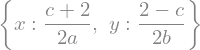

In [25]:
a, b, c = sp.var('a, b, c')
solution = sp.solve([a*x + b*y - 2,
                        a*x - b*y - c], [x, y])
solution

In [26]:
solution.items()

dict_items([(x, (c + 2)/(2*a)), (y, (2 - c)/(2*b))])

In [27]:
a= [i for i in solution.values()]

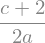

In [28]:
a[0]

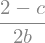

In [29]:
a[1]